## Визуализация данных

### Задание: тип визуализации данных

Загрузите данные по ЕГЭ за последние годы

https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv

выберите данные за 2018-2019 учебный год.

Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.

Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.

Сколько школьников в Строгино, написавших ЕГЭ на 220 баллов и выше?

###############################################################################################################################

Импортируем необходимые библиотеки.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные в датафрейм. Удаляем колонку с NaN.

In [2]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv', sep = ';').dropna(axis = 1)
df.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160
0,8236,Государственное бюджетное общеобразовательное ...,797946035,2016-2017,Восточный административный округ,район Богородское,5,19
1,8237,Государственное казенное общеобразовательное у...,797949150,2016-2017,Восточный административный округ,район Богородское,14,47
2,8238,Государственное казенное общеобразовательное у...,797949275,2016-2017,Восточный административный округ,район Вешняки,0,1
3,8239,Частное учреждение общеобразовательная организ...,797949425,2016-2017,Восточный административный округ,район Вешняки,0,6
4,8240,Автономная некоммерческая организация средняя ...,797949570,2016-2017,Восточный административный округ,район Восточное Измайлово,1,5


Выбираем данные за 2018-2019 учебный год.

In [3]:
data = df[df['YEAR'] == '2018-2019']
data.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160
1498,9734,Государственное бюджетное общеобразовательное ...,1011905064,2018-2019,Восточный административный округ,район Богородское,41,112
1499,9735,Государственное бюджетное общеобразовательное ...,1011905068,2018-2019,Восточный административный округ,район Метрогородок,12,44
1500,9736,Государственное бюджетное общеобразовательное ...,1011905069,2018-2019,Восточный административный округ,район Новогиреево,19,37
1501,9737,Автономная некоммерческая организация средняя ...,1011905070,2018-2019,Восточный административный округ,район Сокольники,1,3
1502,9738,Государственное бюджетное общеобразовательное ...,1011905071,2018-2019,Западный административный округ,район Крылатское,25,51


Сокращаем наименования округов Москвы.

In [4]:
data.AdmArea = data.AdmArea.apply(lambda x: x.split(" ")[0])
data.head()

D:\Anaconda\envs\AI\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160
1498,9734,Государственное бюджетное общеобразовательное ...,1011905064,2018-2019,Восточный,район Богородское,41,112
1499,9735,Государственное бюджетное общеобразовательное ...,1011905068,2018-2019,Восточный,район Метрогородок,12,44
1500,9736,Государственное бюджетное общеобразовательное ...,1011905069,2018-2019,Восточный,район Новогиреево,19,37
1501,9737,Автономная некоммерческая организация средняя ...,1011905070,2018-2019,Восточный,район Сокольники,1,3
1502,9738,Государственное бюджетное общеобразовательное ...,1011905071,2018-2019,Западный,район Крылатское,25,51


Строим свечную диаграмму для визуализации распределения отличников по округам. 

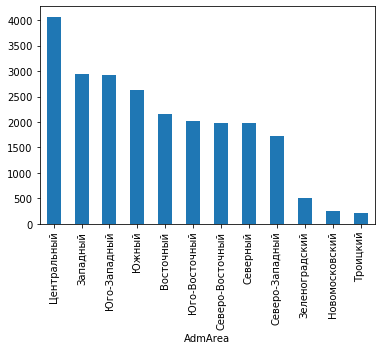

In [12]:
grouped_by_area = data.groupby('AdmArea').sum().sort_values(by = 'PASSES_OVER_220', ascending = False)
pass_over_220 = grouped_by_area.PASSES_OVER_220
pass_over_220.plot.bar(label = "")

Выделяем данные для построения второй диаграммы. Для этого фильтруем данные по названию округа и группируем по районам этого округа. Смотрим на данные по району Строгино для ответа на вопрос.

In [25]:
north_west = data[data['AdmArea'] == 'Северо-Западный']
grouped_by_district = north_west.groupby('District').sum()
pass_over_220_nw = grouped_by_district.PASSES_OVER_220
pass_over_220_nw

District
район Куркино                 175
район Митино                  463
район Покровское-Стрешнево     55
район Северное Тушино         210
район Строгино                188
район Хорошёво-Мнёвники       293
район Щукино                  206
район Южное Тушино            126
Name: PASSES_OVER_220, dtype: int64

Строим диаграмму пирог для визуализации количества отличников по районам Северо-Западного округа Москвы.

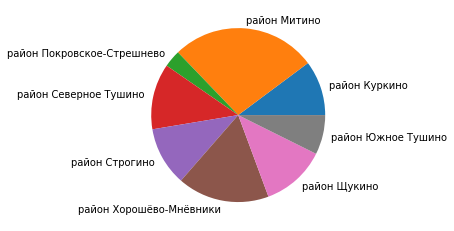

In [46]:
pass_over_220_nw.plot.pie(label = "")

### Задание: результаты марафона

Загрузите данные по итогам марафона

https://video.ittensive.com/python-advanced/marathon-data.csv

Приведите время половины и полной дистанции к секундам.

Найдите, данные каких серии данных коррелируют (используя диаграмму pairplot в Seaborn).

Найдите коэффициент корреляции этих серий данных, используя scipy.stats.pearsonr.

Постройте график jointplot для коррелирующих данных.

###############################################################################################################################

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

Загружаем данные в датафрейм.

In [2]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/marathon-data.csv')
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


Функция для перевода времени в секунды.

In [5]:
def time_to_sec(time):
    
    ls = time.split(':')
    seconds = int(ls[0]) * 3600 + int(ls[1]) * 60 + int(ls[2])
    
    return seconds

Приводим время половины и полной дистанции к секундам.

In [9]:
df.split = df.split.apply(time_to_sec)
df.final = df.final.apply(time_to_sec)
df.head()

,age,gender,split,final
0,33,M,3938,7731
1,32,M,3986,7768
2,31,M,4009,7842
3,38,M,3976,8025
4,31,M,3992,8039


Строим диаграмму парных графиков. Полчившийся результат говорит о том что сильнее всего коррелируют колонки split и final.

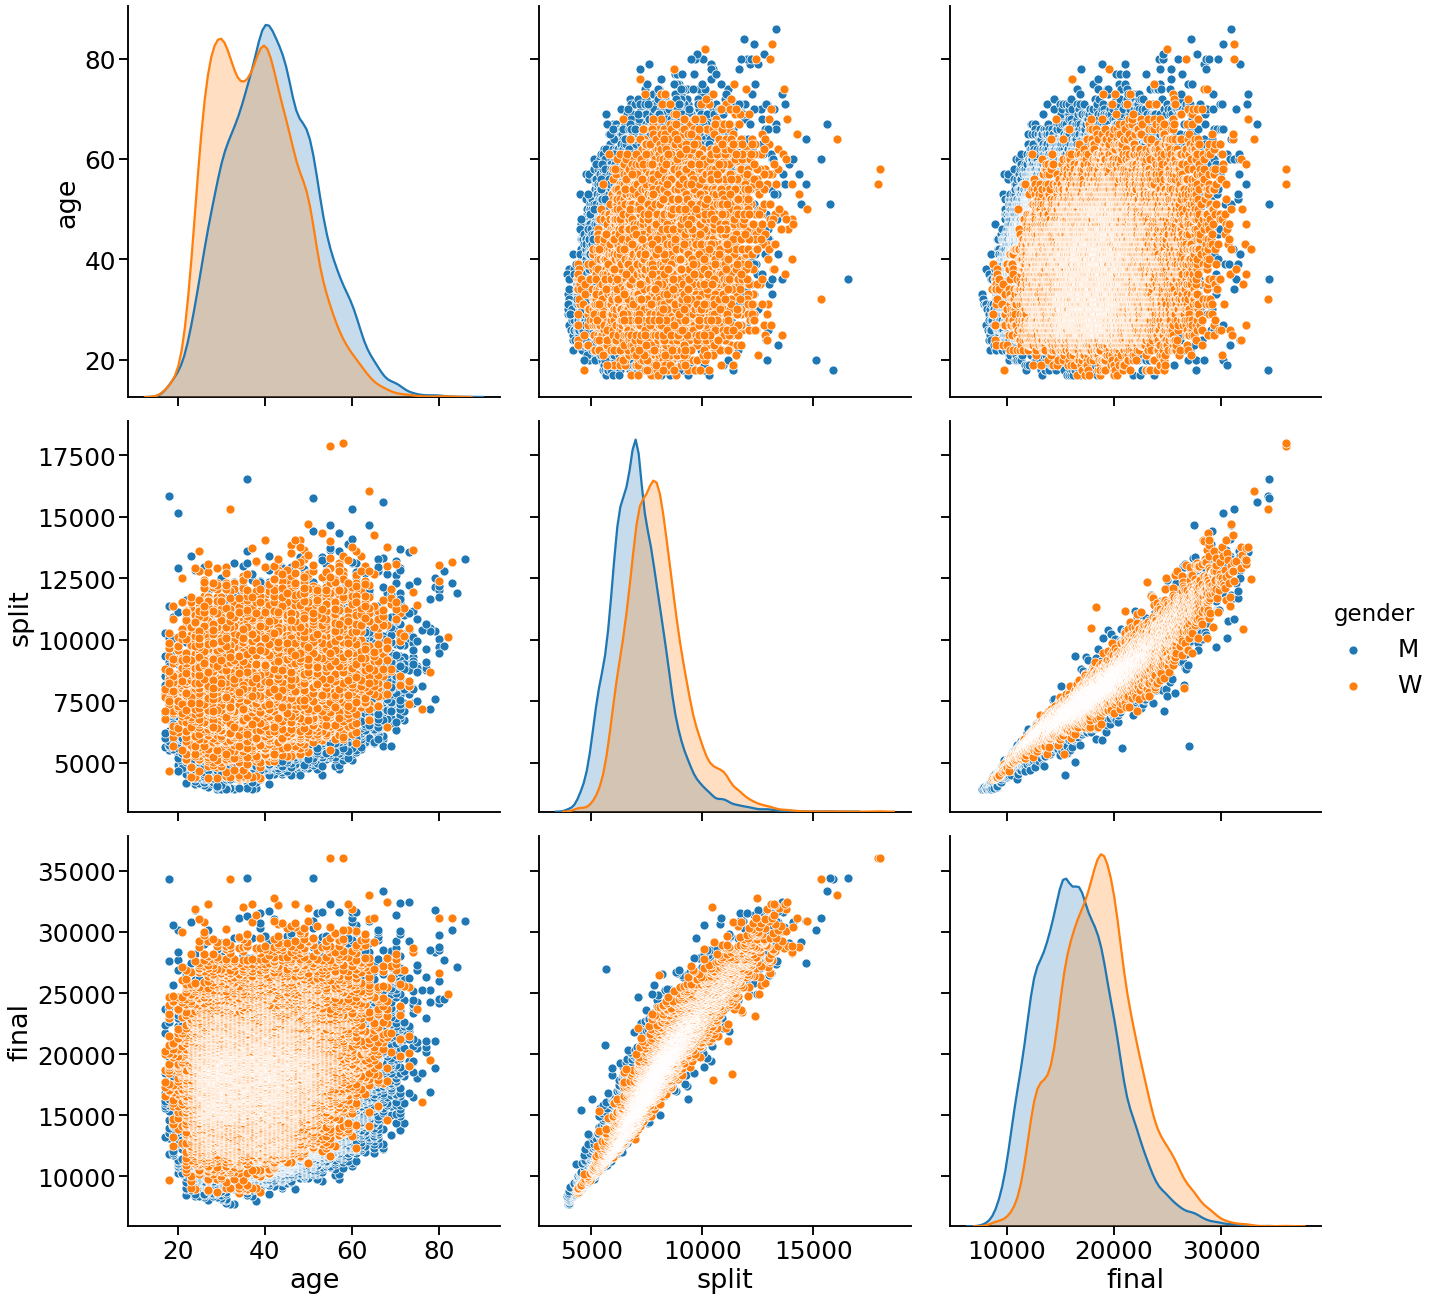

In [11]:
sns.set_context('talk', font_scale = 1.5)
sns.pairplot(df, hue = 'gender', height = 6)
plt.show()

Для этих колонок мы строим jointplot.

D:\Anaconda\envs\AI\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


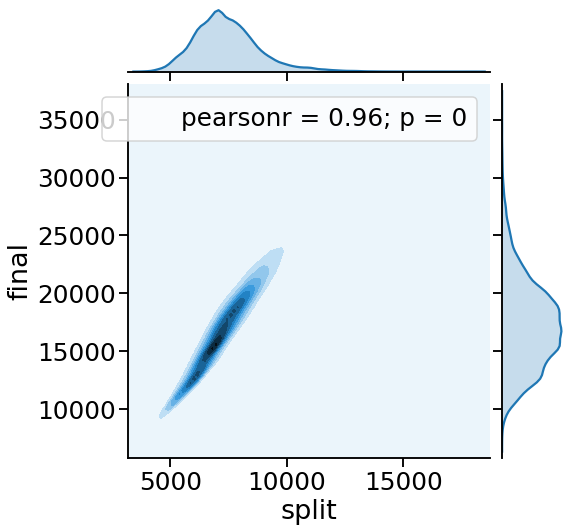

In [14]:
sns.jointplot('split', 'final', df, height = 8, kind = 'kde').annotate(st.pearsonr)
plt.show()

И выводим коэффициент корреляции по Пирсону.

In [16]:
print(round(st.pearsonr(df.split, df.final)[0], 2))

0.96


### Задание: скользящие средние на биржевых графиках

Используя данные индекса РТС за последние годы

https://video.ittensive.com/python-advanced/rts-index.csv

постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.

Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.

Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).

После какого дня 2019 года индекс РТС по закрытию окончательно превысил максимальные показатели за аналогичный день 2017 года?

###############################################################################################################################

Импортируем библиотеки.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Считываем данные в датафрейм, дропаем колонку с отсутствующими значениями. Разворачиваем данные в хронологическом порядке, для этого реиндексируем датафрейм.

In [101]:
df = pd.read_csv('https://video.ittensive.com/python-advanced/rts-index.csv').drop('Unnamed: 7', axis = 1)
df = df[::-1]
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df.head()

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD"
0,04.09.1995,99.80,99.80,99.80,99.80,1000395.0,NaN
1,05.09.1995,100.42,100.42,100.42,100.42,1669902.0,NaN
2,06.09.1995,99.74,99.74,99.74,99.74,927829.0,NaN
3,07.09.1995,101.30,101.30,101.30,101.30,2153945.0,NaN
4,08.09.1995,101.30,101.30,101.30,101.30,1318431.0,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        6058 non-null   object 
 1   Open                        6058 non-null   float64
 2   Max                         6058 non-null   float64
 3   Min                         6058 non-null   float64
 4   Close                       6058 non-null   float64
 5   Trading Volume, USD         6056 non-null   float64
 6   Market Capitalization, USD  5660 non-null   float64
dtypes: float64(6), object(1)
memory usage: 331.4+ KB


Разделяем колонку с датой на число и месяц, а так же год, для того чтобы отфильтровать данные по году.

In [103]:
df['Year'] = df['Date'].apply(lambda x: x[6:])
df['Date'] = df['Date'].apply(lambda x: x[:5])
df.head()

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD",Year
0,04.09,99.80,99.80,99.80,99.80,1000395.0,NaN,1995
1,05.09,100.42,100.42,100.42,100.42,1669902.0,NaN,1995
2,06.09,99.74,99.74,99.74,99.74,927829.0,NaN,1995
3,07.09,101.30,101.30,101.30,101.30,2153945.0,NaN,1995
4,08.09,101.30,101.30,101.30,101.30,1318431.0,NaN,1995


Разделяем данные по годам. Создаём данные по экспоненциальному среднему за 20 дней для значения Max за 2017 год.

In [107]:
df_2019 = df[df['Year'] == '2019'].reset_index().drop('index', axis = 1)
df_2018 = df[df['Year'] == '2018'].reset_index().drop('index', axis = 1)
df_2017 = df[df['Year'] == '2017'].reset_index().drop('index', axis = 1)
exp_2017 = df_2017['Max'].ewm(span=20).mean()

Отрисовываем графики для данных по 2017, 2018, 2019 годам и среднему экспоненциальному за 2017 год. 

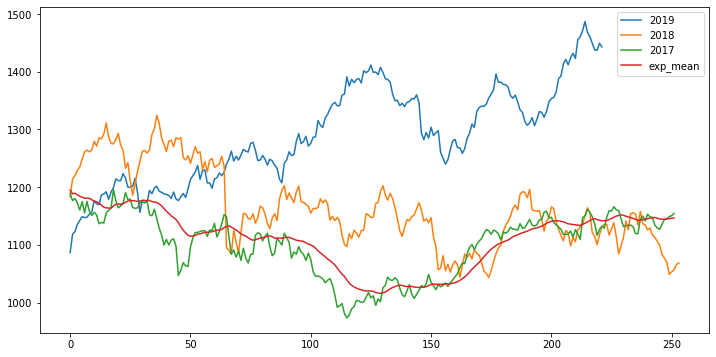

In [129]:
plt.figure(figsize = (12, 6))
plt.plot(df_2019.index, df_2019['Close'], label = '2019')
plt.plot(df_2018.index, df_2018['Close'], label = '2018')
plt.plot(df_2017.index, df_2017['Close'], label = '2017')
plt.plot(exp_2017, label = 'exp_mean')
plt.legend()

Выводим на экран длинну датафреймов, значения которых будем сравнивать.

In [130]:
print(len(df_2019))
print(len(exp_2017))

222
252


Находим последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году. Для этого фильтруем значения Close за 2019 год, сравнивая их с серией данных по среднему экспоненциальному.

Дата когда индекс РТС в 2019 году по закрытию окончательно превысил максимальные показатели за аналогичный день 2017 будет находится в конце полученного датафрейма.

In [131]:
compare = df_2019[df_2019['Close'] < exp_2017[0:222]]
compare.tail()

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD",Year
9,17.01,1156.42,1157.89,1148.25,1157.06,5.584282e+08,1.521189e+11,2019
11,21.01,1175.84,1178.44,1171.09,1171.09,4.159786e+08,1.539637e+11,2019
12,22.01,1170.32,1170.32,1161.91,1169.79,5.071506e+08,1.537919e+11,2019
29,14.02,1169.05,1174.19,1151.95,1156.31,1.001224e+09,1.520201e+11,2019
32,19.02,1174.60,1180.01,1164.89,1173.64,4.949213e+08,1.542981e+11,2019


### Задание: объекты культурного наследия России

Изучите набор данных по объектам культурного наследия России (в виде gz-архива):

https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz

и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные

https://video.ittensive.com/python-advanced/russia.json

Выведите для каждого региона количество объектов в нем.

Посчитайте число объектов культурного наследия в Татарстане.

Чему равно число объектов культурного наследия в Алтайском крае?

###############################################################################################################################

Импортируем библиотеки.

In [132]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
import gzip
%matplotlib inline

Считываем данные в датафрейм. Приводим названия регионов в одинаковый формат.

In [133]:
df = pd.read_csv('data-44-structure-4.csv.gz').dropna(axis=1)
df['Регион'] = df['Регион'].str.upper()
df.head()

D:\Anaconda\envs\AI\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Объект,Номер в реестре,Id,Регион,учетный номер,Id.1,Категория историко-культурного значения,Id.3,Вид объекта,Id.5,Id.6,Id.7,относительный URL объекта,категория объекта
0,Магазин Трубицина,231410038780005,22,АЛТАЙСКИЙ КРАЙ,22-2401,2,Регионального значения,1,Памятник,2,2,150898,/cdm/v2/heritages/1/150898,heritage
1,Дом Татарниковой (деревянный),231410037170005,22,АЛТАЙСКИЙ КРАЙ,22-2434,2,Регионального значения,1,Памятник,2,2,150911,/cdm/v2/heritages/1/150911,heritage
2,Колокольня (деревянная),101410036630006,10,РЕСПУБЛИКА КАРЕЛИЯ,10-619,1,Федерального значения,1,Памятник,1,1,147977,/cdm/v2/heritages/1/147977,heritage
3,Образец городского административного здания,481410031550005,45,КУРГАНСКАЯ ОБЛАСТЬ,45-2933,4,Местного (муниципального) значения,1,Памятник,2,2,151187,/cdm/v2/heritages/1/151187,heritage
4,Тобольские ворота Омской крепости,581410032070006,55,ОМСКАЯ ОБЛАСТЬ,55-3930,1,Федерального значения,1,Памятник,2,2,152037,/cdm/v2/heritages/1/152037,heritage


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144425 entries, 0 to 144424
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Объект                                   144425 non-null  object
 1   Номер в реестре                          144425 non-null  object
 2   Id                                       144425 non-null  int64 
 3   Регион                                   144425 non-null  object
 4   учетный номер                            144425 non-null  object
 5   Id.1                                     144425 non-null  int64 
 6   Категория историко-культурного значения  144425 non-null  object
 7   Id.3                                     144425 non-null  int64 
 8   Вид объекта                              144425 non-null  object
 9   Id.5                                     144425 non-null  int64 
 10  Id.6                                     144

Фильтруем датафрейм по заданному региону. Выводим на экран длину полученного датафрейма - число объектов культурного наследия в Алтайском крае.

In [136]:
altay = df[df['Регион'] == 'АЛТАЙСКИЙ КРАЙ']
len(altay)

4480

Считываем в датафрейм геоданные. Приводим названия регионов к единому формату.

In [137]:
geo_df = gpd.read_file('https://video.ittensive.com/python-advanced/russia.json')
geo_df['NL_NAME_1'] = geo_df['NL_NAME_1'].str.upper()
geo_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry
0,186,RUS,Russia,28,Karachay-Cherkess,КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА,Karaçay-Çerkes|Karachay-Cherkessiya|Karachayev...,Respublika,Republic,"POLYGON ((42.13194 44.34488, 42.19061 44.32248..."
1,186,RUS,Russia,29,Karelia,РЕСПУБЛИКА КАРЕЛИЯ,Karelian A.S.S.R.|Karelo-Finnish A.S.S.R.|Kare...,Respublika,Republic,"MULTIPOLYGON (((36.77098 64.02402, 36.75969 64..."
2,186,RUS,Russia,30,Kemerovo,КЕМЕРОВСКАЯ ОБЛАСТЬ,Kemerovskaya Oblast,Oblast,Region,"POLYGON ((88.63731 56.77809, 88.64615 56.73922..."
3,186,RUS,Russia,31,Khabarovsk,ХАБАРОВСКИЙ КРАЙ,Khabarovskiy Kray,Kray,Territory,"MULTIPOLYGON (((136.64362 45.04694, 136.64417 ..."
4,186,RUS,Russia,32,Khakass,РЕСПУБЛИКА ХАКАСИЯ,Khakassiya|Republic of Khakasia|Khakasskaya A....,Respublika,Republic,"MULTIPOLYGON (((91.45279 53.70172, 91.44386 53..."


Группируем данные первого датафрейма по регионам.

In [150]:
grouped_df = df.groupby('Регион').count().reset_index()
grouped_df.head()

,Регион,Объект,Номер в реестре,Id,учетный номер,Id.1,Категория историко-культурного значения,Id.3,Вид объекта,Id.5,Id.6,Id.7,относительный URL объекта,категория объекта
0,АЛТАЙСКИЙ КРАЙ,4480,4480,4480,4480,4480,4480,4480,4480,4480,4480,4480,4480,4480
1,АМУРСКАЯ ОБЛАСТЬ,636,636,636,636,636,636,636,636,636,636,636,636,636
2,АРХАНГЕЛЬСКАЯ ОБЛАСТЬ,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958
3,АСТРАХАНСКАЯ ОБЛАСТЬ,901,901,901,901,901,901,901,901,901,901,901,901,901
4,БЕЛГОРОДСКАЯ ОБЛАСТЬ,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155


Проверяем совпадают ли названия регионов в датафрейме с данными и датафрейме с геоданными.

In [149]:
bools = grouped_df['Регион'] == sorted(geo_df.NL_NAME_1.values)
print(bools)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True False  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True]


Приводим названия регионов в датафреймах к единому виду. В дальнейшем нам это понадобится для объединения данных.

In [151]:
for i, b in enumerate(bools):
    if not b:
        grouped_df['Регион'][i] = sorted(geo_df.NL_NAME_1.values)[i] 

D:\Anaconda\envs\AI\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Проверяем все ли названия совпадают.

In [153]:
print(grouped_df['Регион'].values == sorted(geo_df.NL_NAME_1.values))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


Объединяем данные по названию региона.

In [154]:
full_df = pd.merge(left = geo_df, right = grouped_df, left_on = 'NL_NAME_1', right_on = 'Регион', how = 'left')

Приводим данные к проекции Меркатора. Визуализируем полученный датафрейм. Отрисовываем карту регионов России и наносим на неё число объектов культурного наследия в каждом из них.

D:\Anaconda\envs\AI\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


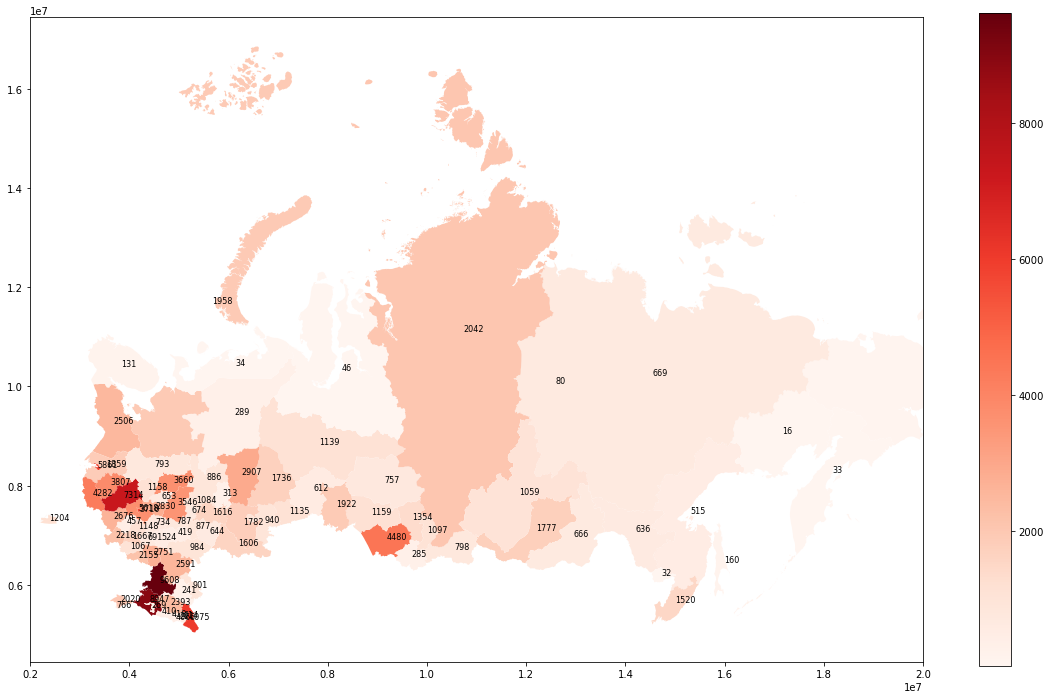

In [157]:
full_df = full_df.to_crs({"init": 'epsg:3857'})
fig = plt.figure(figsize = (20,12))
area = plt.subplot(1, 1, 1)
full_df.plot(ax = area, legend=True, column = "Объект", cmap = "Reds")
area.set_xlim(2e6, 2e7)
for _, region in full_df.iterrows():
    area.annotate(region["Объект"], xy = (region.geometry.centroid.x, region.geometry.centroid.y), fontsize = 8)
plt.show()